In [54]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import scipy.stats as stats

## question 1

In [14]:

def chose(n,k):
    factorial = lambda n: np.product([i for i in range(1, n+1)])
    return factorial(n) / (factorial(k)*factorial(n-k))
def binomial(theta,k):
    return chose(10,k) * ((theta) ** (k)) * ((theta) ** (10-k))
def p_val(t):
    v_binomial = np.vectorize(binomial)
    return np.sum(v_binomial(.5, np.array(range(t,11))))
p_val(7)

0.171875

## Question 2 
### 2a

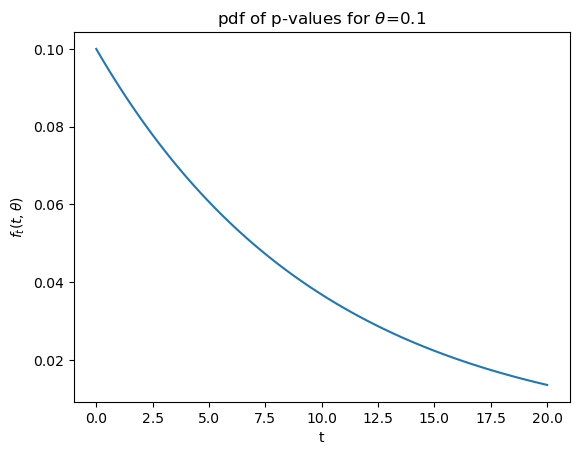

Text(0.5, 1.0, 'pdf of p-values for $\\theta$=1')

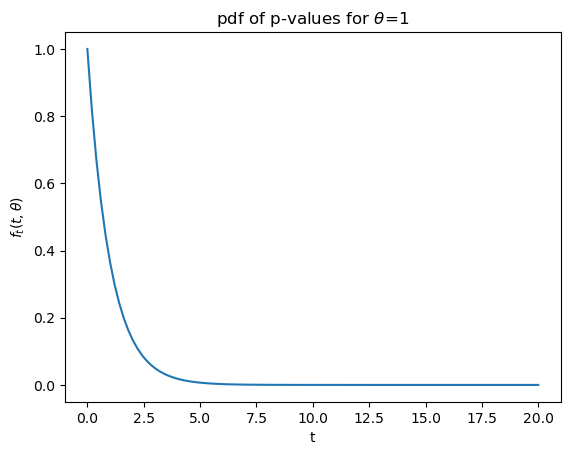

In [28]:
def pdf(theta,x):
    return theta*np.exp(-theta*x)
theta=.1
x=np.linspace(0,20,100)
y=pdf(theta, x)
plt.plot(x,y)
plt.xlabel("t")
plt.ylabel("$f_{t}(t, \\theta)$")
plt.title("pdf of p-values for $\\theta$={0}".format(theta))
plt.show()
theta=1
x=np.linspace(0,20,100)
y=pdf(theta, x)
plt.plot(x,y)
plt.xlabel("t")
plt.ylabel("$f_{t}(t, \\theta)$")
plt.title("pdf of p-values for $\\theta$={0}".format(theta))


### 2b

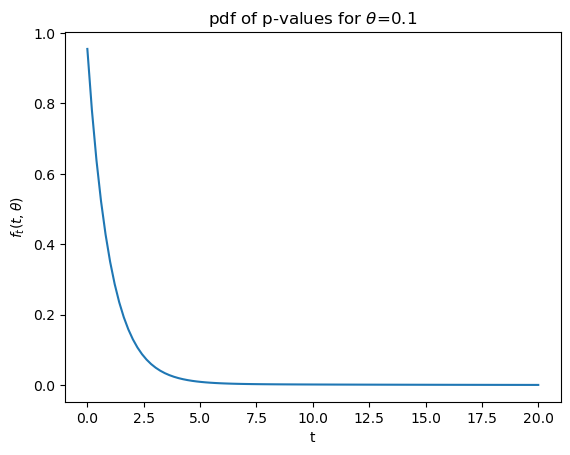

In [29]:
def pdf(theta,x):
    return (theta*np.exp(-theta*x)/20)+(19*np.exp(-x)/20)
theta=.1
x=np.linspace(0,20,100)
y=pdf(theta, x)
plt.plot(x,y)
plt.xlabel("t")
plt.ylabel("$f_{t}(t, \\theta)$")
plt.title("pdf of p-values for $\\theta$={0}".format(theta))
plt.show()
theta=1


## question 2c

In [128]:
p=1/2
alpha=.05
theta=.01
def condtional(p, theta , alpha):
    numerator=p*alpha
    denominator= numerator +(1-p)*(np.exp(-theta*np.log(alpha)))
    return numerator/denominator
condtional(p, theta , alpha)

0.04627870362231976

## question 2d

Text(0.5, 1.0, 'conditional probability that dug does not work for given p-value $\\pi$ and $\\theta=0.1$')

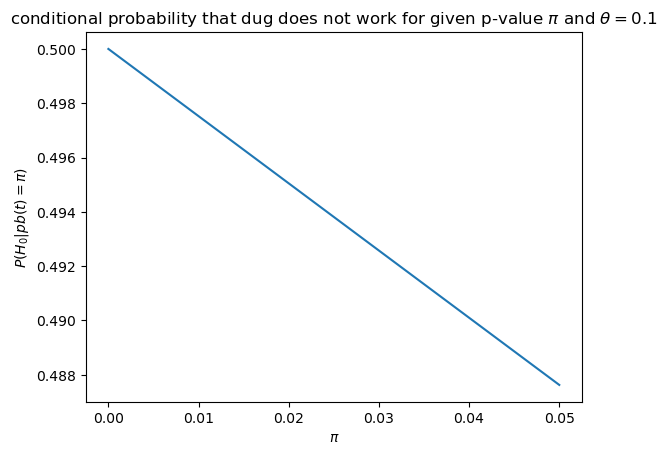

In [43]:
p=1/2
alpha=.05
theta=.01
pi=.01
def condtional(p, theta , alpha,pi):
    numerator=p*np.exp(-pi )
    denominator= numerator +(1-p)*(np.exp(-theta*pi))
    return numerator/denominator
x=np.linspace(0,.05,100)
plt.plot(x,condtional(p, theta , alpha,x))
plt.xlabel("$\\pi$")
plt.ylabel("$P(H_0|pb(t)=\\pi)$")
plt.title("conditional probability that dug does not work for given p-value $\\pi$ and $\\theta=0.1$")

In [103]:
data=pd.read_csv(r'/home/buzgalbraith/work/school/spring_2023/probaility-theroy-2-2023/homework_code/homework_7/data/AB_NYC_2019.csv')

## question 4a. 

In [104]:
group_a = data[data['neighbourhood']=='Upper West Side']['price'].to_numpy()
group_b = data[data['neighbourhood']=='Upper East Side']['price'].to_numpy()
labelless_group=np.concatenate((group_a,group_b))

In [127]:
def test_stat(a,b):
    return np.abs(np.mean(a)-np.mean(b))
observed_test_stat=test_stat(group_a, group_b)
gaussian=stats.norm(loc=0,scale=240.15)
two_sided_pval=2*(1-gaussian.cdf(observed_test_stat))
two_sided_pval

0.927107499249157

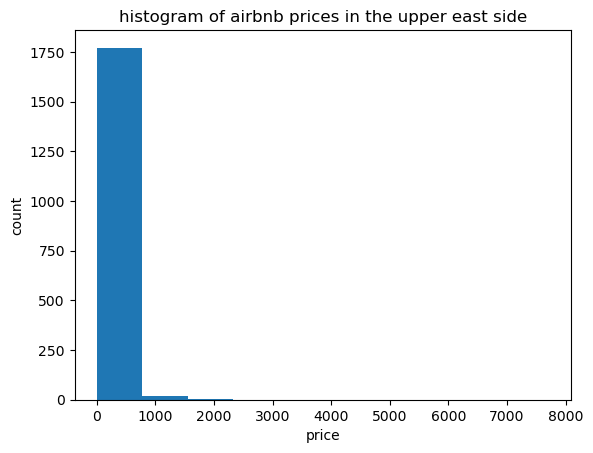

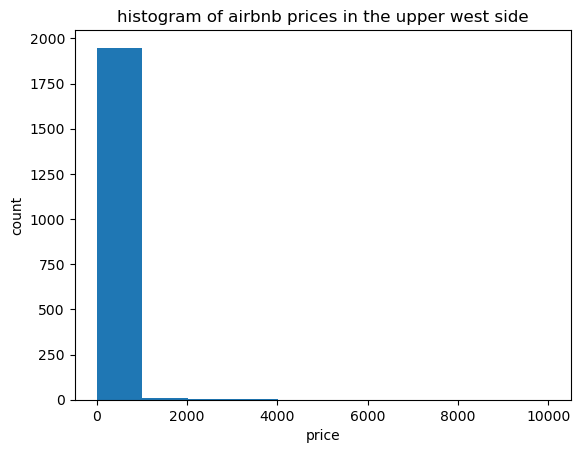

In [62]:
plt.hist(group_a["price"])
plt.xlabel("price")
plt.ylabel("count")
plt.title("histogram of airbnb prices in the upper east side")
plt.show()
plt.hist(group_b["price"])
plt.xlabel("price")
plt.ylabel("count")
plt.title("histogram of airbnb prices in the upper west side")
plt.show()

In [134]:
group_a=df[df["neighbourhood"]=="Upper East Side"]["price"]
group_b=df[df["neighbourhood"]=="Upper West Side"]["price"]
labelless_group=np.concatenate((group_a,group_b))
def test_stat(a,b):
    return np.abs(np.median(a)-np.median(b))
def monte_carlo_permutation(labelless_group,n=1000):
    rng = np.random.default_rng()
    test_stats=[]
    for i in range(n):
        rng.shuffle(labelless_group)
        a=labelless_group[:len(group_a)]
        b=labelless_group[len(group_a):]
        test_stats.append(test_stat(a,b))
    return test_stats
n=10000
mc_test_stats=monte_carlo_permutation(labelless_group,n)
test_stat_observed=test_stat(group_a,group_b)
p_val=np.sum(mc_test_stats>=test_stat_observed)/n
p_val

0.3281